In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import re
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import attila_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Lipid analysis

In [2]:
fpath = '../../resources/lipid-data-species-normalized-pretty.csv'
norm_lipid_species = pd.read_csv(fpath, header=[0, 1], index_col=[0, 1])
fpath = '../../resources/lipid-data-species-pretty.csv'
lipid_species = pd.read_csv(fpath, header=[0, 1], index_col=[0, 1])

In [3]:
brain_regions = ['DLPFC', 'CN', 'Putamen']

In [4]:
s = lipid_species.stack(level=1).stack().rename_axis(['Group', 'Species', 'Region', 'Subject'])
endog = s.to_frame('Level')
exog = s.index.to_frame()
exog['Dx'] = [re.sub('^(Control|ChAc).*$', '\\1', s) for s in exog.Subject]
data = pd.concat([endog, exog], axis=1)
data = data.astype({
    'Region': CategoricalDtype(categories=brain_regions, ordered=True),
    'Dx': CategoricalDtype(categories=['Control', 'ChAc'], ordered=True),
                   })
data

Level Group     Species   Region  \
Group Species    Region  Subject                                          
FC    FC         CN      ChAc 1     74.76526    FC          FC       CN   
                         ChAc 2     62.75982    FC          FC       CN   
                         ChAc 3     85.05140    FC          FC       CN   
                         ChAc 4     85.80184    FC          FC       CN   
                         Control 1  86.01249    FC          FC       CN   
...                                      ...   ...         ...      ...   
NSer  NSer 22:6  Putamen Control 2   0.00024  NSer  NSer 22:6   Putamen   
                         Control 3   0.00074  NSer  NSer 22:6   Putamen   
                         Control 4   0.00008  NSer  NSer 22:6   Putamen   
                         Control 5   0.00034  NSer  NSer 22:6   Putamen   
                         Control 6   0.00042  NSer  NSer 22:6   Putamen   

                                      Subject       Dx  
Group Species    Region  Subject                        
FC    FC         CN      ChAc 1        ChAc 1     ChAc  
                         ChAc 2        ChAc 2     ChAc  
                         ChAc 3        ChAc 3     ChAc  
                         ChAc 4        ChAc 4     ChAc  
                         Control 1  Control 1  Control  
...                                       ...      ...  
NSer  NSer 22:6  Putamen Control 2  Control 2  Control  
                         Control 3  Control 3  Control  
                         Control 4  Control 4  Control  
                         Control 5  Control 5  Control  
                         Control 6  Control 6  Control  

[17790 rows x 6 columns]

In [5]:
def extract_group(group, data=data):
    val = data.xs(group, axis=0, level='Group')
    return(val)

d = extract_group('BMP')

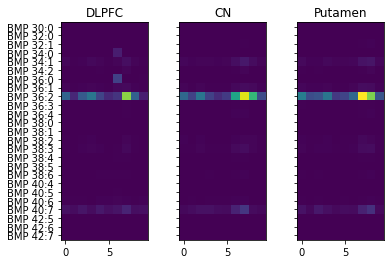

In [6]:
def heatmap(group, data=lipid_species):
    fig, ax = plt.subplots(1, 3, sharey=True)
    for ix, region in enumerate(brain_regions):
        d = data.xs(group, axis=0, level=0)
        vmin = d.min().min()
        vmax = d.max().max()
        d = d.xs(region, axis=1, level=1)
        ax[ix].imshow(d, interpolation='none', vmin=vmin, vmax=vmax)
        ax[ix].set_title(region)
        ax[ix].set_yticks(range(len(d)))
        ax[ix].set_yticklabels(d.index)
    return((fig, ax))    

fig, ax = heatmap('BMP')

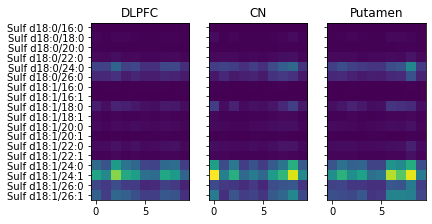

In [7]:
fig, ax = heatmap('Sulf')

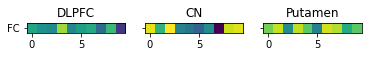

In [8]:
fig, ax = heatmap('FC')

In [9]:
%connect_info

{
  "shell_port": 58738,
  "iopub_port": 58739,
  "stdin_port": 58740,
  "control_port": 58742,
  "hb_port": 58741,
  "ip": "127.0.0.1",
  "key": "cb655d5b-0723ead18e1739c75c260065",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-92dc17a4-3ede-42d4-8ab8-607ddeecd669.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
